# グラフデータと経路

In [3]:
import numpy as np
import networkx as nx

%matplotlib inline

In [4]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

## グラフとは

**グラフ（graph）** とは，以下の図のように「点」と「つながり」によって表されるデータである．
事物間の**関係性を抽象化**することができる強力なデータ構造である．
分野によっては，グラフのことをネットワークと呼ぶこともある．

数学的には，グラフは**ノード（node）** の集合と**エッジ（edge）** の集合から構成されるデータを意味する．
ノードはグラフを構成する要素であり，頂点と呼ばれることもある．
エッジはノード間の連結関係を示すものであり，枝と呼ばれることもある．
エッジは重みを持つことがある．

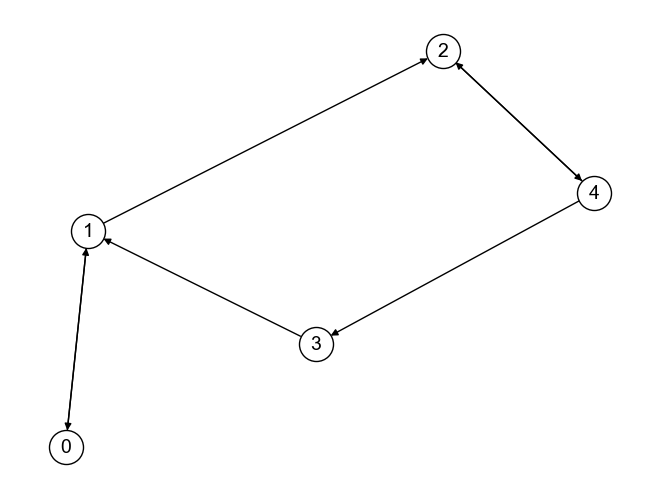

In [5]:
# n: number of node, m: number of edge
G_sample1 = nx.fast_gnp_random_graph(n=5, p=0.4, directed=True, seed=1123)
nx.draw(G_sample1, **DRAW_CONFIG)

グラフには，
- エッジに方向性を有する**有向グラフ（directed graph）** 
- エッジに方向性を有しない**無向グラフ（undirected graph）** 

の2種類に大別される．

以下は有向グラフの例．

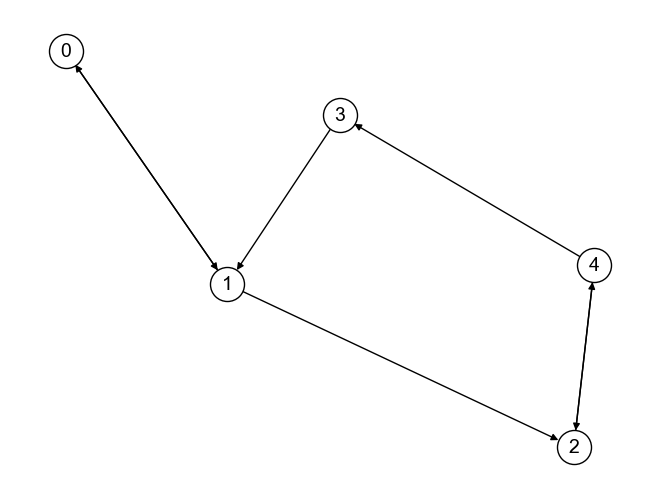

In [6]:
nx.draw(G_sample1, **DRAW_CONFIG)

以下は，上記有向グラフのエッジから方向性を除いた無向グラフ．

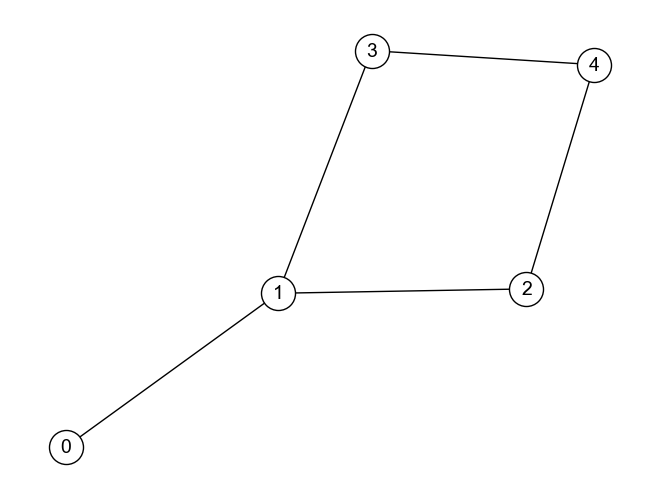

In [7]:
G_sample2 = G_sample1.to_undirected()
nx.draw(G_sample2, **DRAW_CONFIG)

### NetworkXでグラフを定義する 

[NetworkX](https://networkx.org/)は，グラフを効率的に扱うためのPythonライブラリである．
NetworkXを使うには，以下のようにライブラリをインポートする．

In [8]:
import networkx as nx

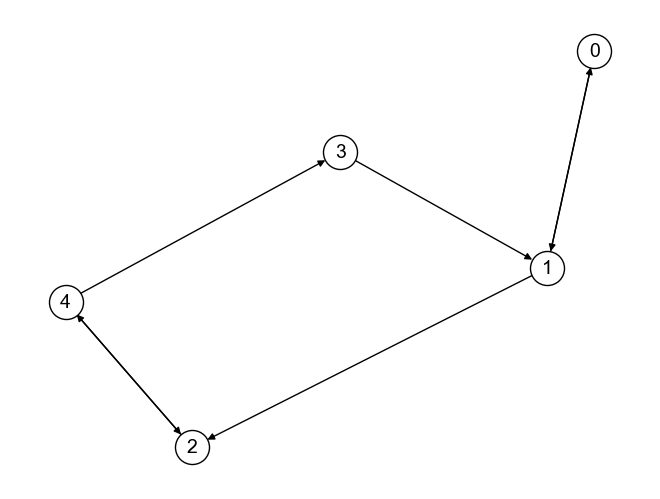

In [9]:
nx.draw(G_sample1, **DRAW_CONFIG)

さて，上のグラフをNetworkXで定義してみよう．
以下のコードを実行すると，上の有向グラフを定義し可視化できる．

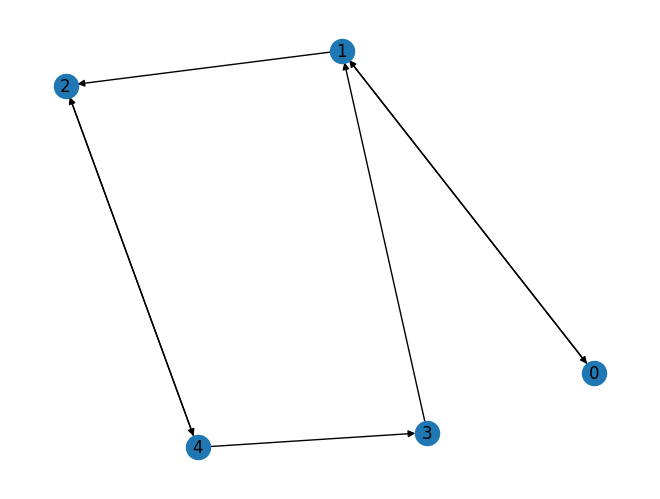

In [10]:
# ノードの集合
V = [0, 1, 2, 3, 4]

# エッジの集合
E = [(0, 1), (1, 0), (1, 2),
     (2, 4), (3, 1), (4, 2),
     (4, 3)]

G = nx.DiGraph() # 空の有効グラフを用意
G.add_nodes_from(V) # ノードの追加
G.add_edges_from(E) # エッジの追加

# グラフGの可視化
nx.draw(G, with_labels=True)

次は上記グラフを無向グラフ化したものを定義してみよう．
以下がそのコードである．

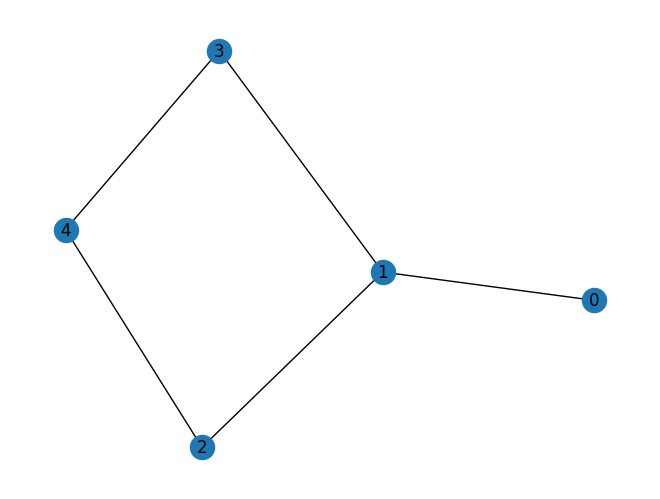

In [11]:
# ノードの集合
V = [0, 1, 2, 3, 4]

# エッジの集合
E = [(0, 1), (1, 2),
     (1, 0), # これを書いても(0, 1)があるので無視される
     (2, 4), (3, 1),
     (4, 2), # これを書いても(2, 4)があるので無視される
     (4, 3)
]

G_undirected = nx.Graph() # 空の無効グラフを用意（DiGraphではない事に注意）
G_undirected.add_nodes_from(V) # ノードの追加
G_undirected.add_edges_from(E) # エッジの追加

# グラフGの可視化
nx.draw(G_undirected, with_labels=True)

定義したグラフのノードとエッジを確認してみよう．
以下のコードでグラフのノード集合とエッジ集合を取得することができる．

In [12]:
# ノードの取得
V = G_undirected.nodes()

# エッジの取得
E = G_undirected.edges()

In [13]:
# エッジを表示してみる
for edge in E:
    print(edge)

(0, 1)
(1, 2)
(1, 3)
(2, 4)
(3, 4)


### 隣接行列

グラフにおけるノードの接続関係を示す行列は**隣接行列（adjacency matrix）** と呼ばれる．
以下のグラフ$G$の隣接行列を考えてみよう．

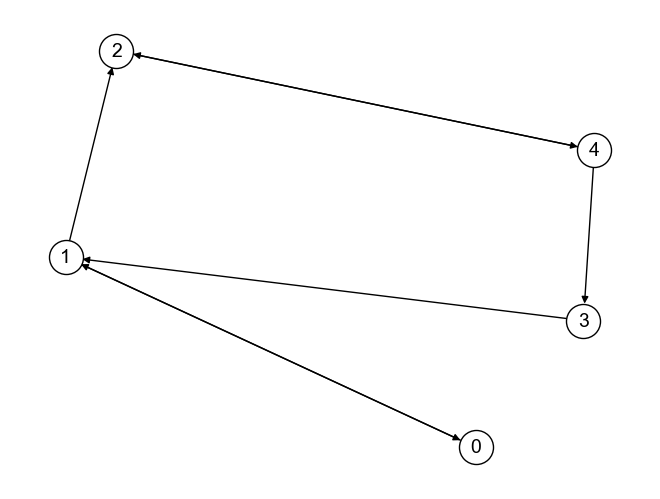

In [14]:
nx.draw(G, **DRAW_CONFIG)

上記グラフ$G$の隣接行列$A$は，

$$
\boldsymbol{A} =
        \left[\begin{array}{ccccc}
            0 & 1 & 0 & 0 & 0 \\
            1 & 0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 0 & 1 \\
            0 & 1 & 0 & 0 & 0 \\
            0 & 0 & 1 & 1 & 0 \\
        \end{array}\right]
$$

となる．


NetworkXでグラフ$G$の隣接行列$A$（numpy.ndarray形式）を取得するには，以下のようにする．

In [15]:
A = nx.adjacency_matrix(G).toarray()

In [16]:
A

array([[0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0]])

ちなみに，NetworkXでグラフに属する任意のノードの隣接ノードを取得するには`neighbors`メソッドを使う．
以下は，グラフ$G$に属するノード1の隣接ノードを取得するコードである．

In [17]:
neighbors = list(G.neighbors(1))

In [18]:
neighbors

[0, 2]

## 経路

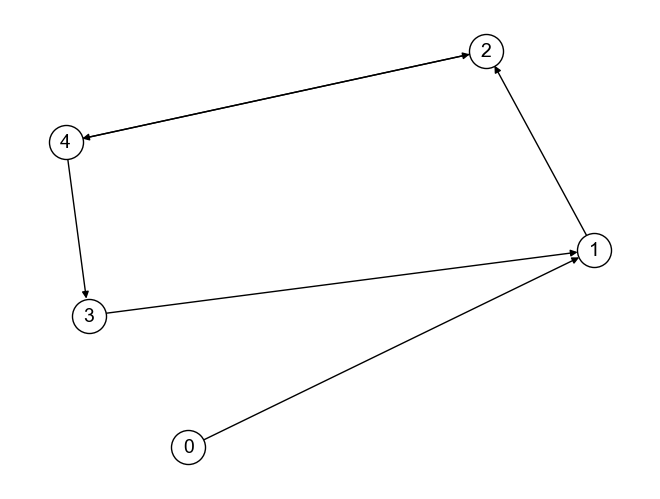

In [19]:
G = G_sample1.copy()
G.remove_edge(1, 0)

pos = nx.spring_layout(G, seed=123)
nx.draw(G, pos, **DRAW_CONFIG)

グラフ上のエッジをたどって，あるノードから別ノードに移動する際に通るノードの系列を**経路（path）** と呼ぶ．
例えば，上記グラフにおいてノード4からノード2に至る経路は$(4, 2), (4, 3, 1, 2)$などがある．

### 到達可能性

ノード$n_x$からノード$n_y$への経路が存在するとき，$n_x$から$n_y$へ**到達可能**という．
例えば，上記グラフにおいて，ノード0からノード3へは到達可能である．
一方，ノード3からノード0へは到達不可能である．

重みなし行列の場合，隣接行列のべき乗を計算することで到達可能性を調べられる．
グラフ$G$の隣接行列を$A$としたとき，$A^k$のm行n列目の値は，m番目のノードからn番目のノードへkホップで到達できる経路がいくつあるかを示す．

例えば，上記グラフ$G$の隣接行列$A$は

$$
\boldsymbol{A} =
        \left[\begin{array}{ccccc}
            0 & 1 & 0 & 0 & 0 \\
            0 & 0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 0 & 1 \\
            0 & 1 & 0 & 0 & 0 \\
            0 & 0 & 1 & 1 & 0 \\
        \end{array}\right]
$$

であるが，$A^2$は

$$
\boldsymbol{A^2} =
        \left[\begin{array}{ccccc}
            0 & 0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 0 & 1 \\
            0 & 0 & 1 & 1 & 0 \\
            0 & 0 & 1 & 0 & 0 \\
            0 & 1 & 0 & 0 & 1 \\
        \end{array}\right]
$$

となる．
$A^2$において0行2列目の値は1であるが，これは「ノード0からノード2まで2ホップで到達できるノードは1つある」ことを意味している（その経路は$(0, 1, 2)$）．

隣接行列のべき乗を計算すれば，任意のノードからノードへnホップで到達可能かどうかを調べることができる．
これはNetworkXでも簡単にできる．
以下は，上記グラフ$G$の到達可能性を調べるコード例である．

In [20]:
# 隣接行列の取得
A = nx.adjacency_matrix(G).toarray()

# Aの2乗を計算
A @ A

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1]])

In [21]:
# Aのn乗の第(i, j)成分の値は，グラフGのノードiからノードjまでnホップで到達できる経路がいくつあるかを示す
np.linalg.matrix_power(A, 3)

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 2, 1, 0]])

### 距離

ノード$n_x$からノード$n_y$への最短経路の長さを**距離（distance）** と呼ぶ．
グラフのエッジに重みがある場合，距離は最短経路上のエッジの重みの合計値となる．

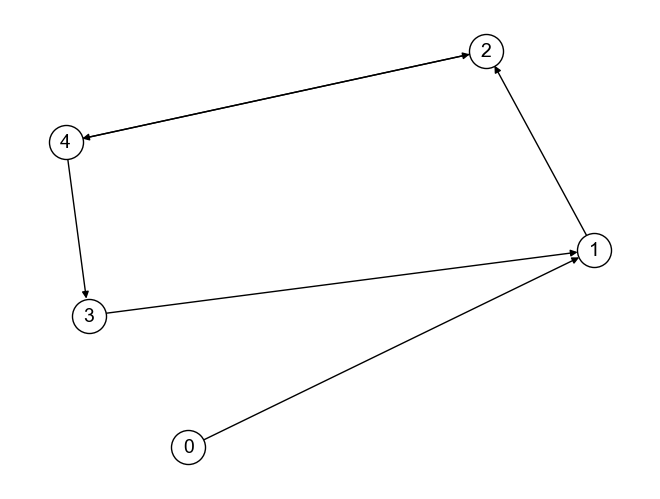

In [22]:
nx.draw(G, pos, **DRAW_CONFIG)

例えば，上記グラフ$G$において，ノード4からノード2への最短経路は$(4, 2)$である．
よって，ノード4からノード2への距離は1である．

NetworkXを用いて，指定したノード間の最短経路を取得するには，`shortest_path`関数を用いる．
以下は，上記グラフ$G$に属するノード0からノード4への最短経路を取得するコードである．

In [25]:
# 返り値は dict[node, shortestpath] 形式の辞書（ジェネレータ）
shortest_path = nx.shortest_path(G, source=0, target=4)
shortest_path

[0, 1, 2, 4]

あるノードから他のノードへの最短経路を取得するには，`single_source_all_shortest_paths`関数を用いる．
以下は，上記グラフ$G$に属するノード3から到達できるすべてのノードとそこまでの最短経路を取得するコードである．

In [21]:
# 返り値は dict[node, shortestpath] 形式の辞書（ジェネレータ）
shortest_paths = dict(nx.single_source_all_shortest_paths(G, 3))

# 表示
for node_to, shortest_path in shortest_paths.items():
    print(f'ノード{node_to}への最短経路: {shortest_path}')

ノード1への最短経路: [[3, 1]]
ノード2への最短経路: [[3, 1, 2]]
ノード3への最短経路: [[3]]
ノード4への最短経路: [[3, 1, 2, 4]]


NetworkXを用いて，グラフ上の全ノード間の最短経路を取得するには，`all_pairs_shortest_path`メソッドを用いる．
以下は，上記グラフ$G$に属する全ノード間の最短経路を取得するコードである．

In [22]:
# 返り値は dict[node, shortestpath] 形式の辞書（ジェネレータ）
shortest_paths = dict(nx.all_pairs_shortest_path(G))

# 表示
for node_from, shortest_paths in shortest_paths.items():
    for node_to, shortest_path in shortest_paths.items():
        print(f'ノード{node_from}からノード{node_to}への最短経路: {shortest_path}')

ノード0からノード0への最短経路: [0]
ノード0からノード1への最短経路: [0, 1]
ノード0からノード2への最短経路: [0, 1, 2]
ノード0からノード4への最短経路: [0, 1, 2, 4]
ノード0からノード3への最短経路: [0, 1, 2, 4, 3]
ノード1からノード1への最短経路: [1]
ノード1からノード2への最短経路: [1, 2]
ノード1からノード4への最短経路: [1, 2, 4]
ノード1からノード3への最短経路: [1, 2, 4, 3]
ノード2からノード2への最短経路: [2]
ノード2からノード4への最短経路: [2, 4]
ノード2からノード3への最短経路: [2, 4, 3]
ノード2からノード1への最短経路: [2, 4, 3, 1]
ノード3からノード3への最短経路: [3]
ノード3からノード1への最短経路: [3, 1]
ノード3からノード2への最短経路: [3, 1, 2]
ノード3からノード4への最短経路: [3, 1, 2, 4]
ノード4からノード4への最短経路: [4]
ノード4からノード2への最短経路: [4, 2]
ノード4からノード3への最短経路: [4, 3]
ノード4からノード1への最短経路: [4, 3, 1]


グラフに属する全ノード間の距離を表記した行列を**距離行列（distance matrix）** と呼ぶ．
上記グラフ$G$の距離行列$D$は

$$
\boldsymbol{D} =
        \left[\begin{array}{ccccc}
            0 & 1 & 2 & 4 & 4 \\
            \infty & 0 & 1 & 3 & 2 \\
            \infty & 3 & 0 & 2 & 1 \\
            \infty & 1 & 2 & 0 & 3 \\
            \infty & 2 & 1 & 1 & 0 \\
        \end{array}\right]
$$
となる．

NetworkXを用いて，グラフの距離行列を取得するには`floyd_warshall_numpy`メソッドを用いる．
このメソッドを用いると，距離行列が`numpy.ndarray`形式で得られる．

以下は上図のグラフ$G$の距離行列を取得するコードである．

In [23]:
# ワーシャルフロイド法による距離行列の算出
nx.floyd_warshall_numpy(G)

array([[ 0.,  1.,  2.,  4.,  3.],
       [inf,  0.,  1.,  3.,  2.],
       [inf,  3.,  0.,  2.,  1.],
       [inf,  1.,  2.,  0.,  3.],
       [inf,  2.,  1.,  1.,  0.]])

---

## クイズ

### Q1: グラフの定義

NetworkXを使って以下のグラフを定義し，可視化しなさい．


![](img/graph-sample.jpg)

### Q2: 到達可能性

Q1で定義したグラフについて，ノード4からノード6に4ホップで到達できる経路はいくつあるかを求めなさい．

### Q3: ソーシャルグラフ

[SNAP Facebook Dataset](https://snap.stanford.edu/data/ego-Facebook.html)は，スタンフォード大学のソーシャルネットワーク分析プロジェクトが公開しているデータセットの一つである．
このデータセットにはFacebookから抽出したユーザ間のつながり（フレンド関係）が格納されている．

以下のコードは，データセットを読み込み，NetworkXのグラフ形式に変換し，グラフを可視化するコードである．
読み込んだグラフ（`G_facebook`）に対して最短経路アルゴリズムを適用し，グラフ上の全ノード間の距離を計算しなさい．
その上で，計算したノード間の距離の平均値を求めなさい．

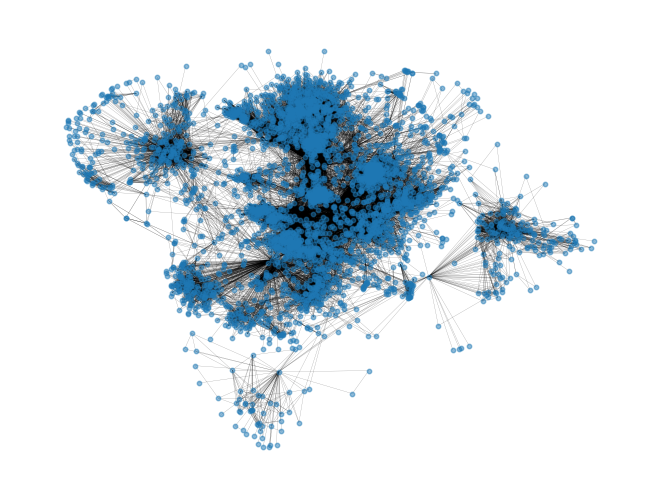

In [24]:
import pandas as pd
import networkx as nx

# データのダウンロード via pandas
facebook_df = pd.read_csv(
    "https://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

# NetworkXのグラフに変換
G_facebook = nx.from_pandas_edgelist(facebook_df, "start_node", "end_node")

# 表示位置を調整して可視化
pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
nx.draw(G_facebook, pos, node_size=10, with_labels=False, width=0.15, alpha=0.5)